<a href="https://colab.research.google.com/github/pharringtonp19/econometrics/blob/main/notebooks/optimization/Loss_landscapes_and_optimization_in_over_parameterized_non_linear_systems_and_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import jax 
import jax.numpy as jnp 
import matplotlib.pyplot as plt 

In [29]:
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import rcParams
from mpl_toolkits import mplot3d
rcParams['image.interpolation'] = 'nearest'
rcParams['image.cmap'] = 'viridis'
rcParams['axes.grid'] = False
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [36]:
def f(x, y):
  return (jnp.sin(x) -y)**2

def f_(z):
  return f(z[0], z[1])

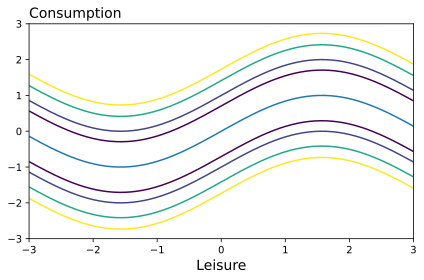

In [35]:
xp=jnp.linspace(-3.,3.,200)  # N
yp=jnp.linspace(-3.,3.,200)  # M

X, Y = jnp.meshgrid(xp, yp)
Z = f(X,Y)
fig = plt.figure(dpi=300, tight_layout=True)
plt.contour(xp,yp,Z, levels=[0.5, 1., 2., 3.0]) 
plt.plot(jnp.linspace(-3., 3., 200), jnp.sin(jnp.linspace(-3., 3., 200)))
plt.title('Consumption', loc='left', size=14)
plt.xlabel('Leisure', size=14)
plt.show()

In [37]:
z = jnp.array([1., jnp.sin(1)])
jax.hessian(f_)(z)

DeviceArray([[ 0.5838531, -1.0806046],
             [-1.0806046,  2.       ]], dtype=float32)

In [32]:
jax.hessian()
  


DeviceArray(0.9092974, dtype=float32, weak_type=True)